# SHARK SPOTS USA 

### Analisis preliminar de datos

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTAMOS CSV DE ATAQUES
shark=pd.read_csv('attacksss.csv', encoding="latin_1")
pd.DataFrame(shark)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#IMPORTAMOS CSV DE CENSO DE USA EXTRAIDO DE UNITED STATES CENSUS BUREAU
popu=pd.read_csv('population3.csv')
pd.DataFrame(popu)

,Unnamed: 0,Name,Year,Resident Population
0,228,Alabama,1950,"3,061,743"
1,229,Alaska,1950,"128,643"
2,230,Arizona,1950,"749,587"
3,231,Arkansas,1950,"1,909,511"
4,232,California,1950,"10,586,223"
...,...,...,...,...
411,674,Virginia,2020,"8,631,393"
412,675,Washington,2020,"7,705,281"
413,676,West Virginia,2020,"1,793,716"
414,677,Wisconsin,2020,"5,893,718"


In [4]:
#DESCRIPTIVAS DE TIPO, NULOS Y UN PANTALLAZO GENERAL DE LA INFORMACION DE ATAQUES
shark.info()
shark.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

## DATA WRANGLING

In [5]:
'''Vemos las columnas para ver que datos tenemos y ver sobre que plantear la hipotesis, viendo cuales nos servirian
y si hay que renombrar para un manejo mas sencillo'''
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
#Vemos que los nombres tienen diferentes formatos, los pasamos a uno unico
shark.columns = shark.columns.str.strip().str.capitalize().str.replace(' ', '_')
shark.columns


Index(['Case_number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(y/n)', 'Time',
       'Species', 'Investigator_or_source', 'Pdf', 'Href_formula', 'Href',
       'Case_number.1', 'Case_number.2', 'Original_order', 'Unnamed:_22',
       'Unnamed:_23'],
      dtype='object')

In [7]:
'''Las columnas type,name,sex,age,injury,fatal,investigator, pdf,href,original,unnamed22,unnamed23, no son necesarias y 
contienen cantidad de nulos que no las hacen siginifcativas en algunos de los casos'''
shark = shark.drop([ 'Type', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(y/n)', 'Investigator_or_source', 'Pdf', 'Href_formula', 'Href',
      'Original_order', 'Unnamed:_22','Unnamed:_23'] , axis = 1) 
shark.columns

Index(['Case_number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Activity', 'Time', 'Species', 'Case_number.1', 'Case_number.2'],
      dtype='object')

In [8]:
#Eliminamos los duplicados y las filas desde la 6301 porque son de NaN
shark=shark.drop_duplicates()
shark=shark[:6301]
shark.shape

(6301, 11)

In [9]:
#Tomamos para nuestra hipotesis solamente el territorio de USA por lo que filtramos por Country
shark_sample= shark[(shark.Country=='USA')]
shark_sample

,Case_number,Date,Year,Country,Area,Location,Activity,Time,Species,Case_number.1,Case_number.2
0,2018.06.25,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,18h00,White shark,2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,14h00 -15h00,NaN,2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,07h45,NaN,2018.06.09,2018.06.09
7,2018.05.27,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,NaN,"Lemon shark, 3'",2018.05.27,2018.05.27
8,2018.05.26.b,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,17h00,"Bull shark, 6'",2018.05.26.b,2018.05.26.b
...,...,...,...,...,...,...,...,...,...,...,...
6249,ND.0056,Before 1958,0.0,USA,Florida,"Palm Beach, Palm Beach County",Standing,NaN,NaN,ND.0056,ND.0056
6283,ND.0019,Before 1921,0.0,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,NaN,NaN,ND.0019,ND.0019
6288,ND.0014,Before 17-Jul-1916,0.0,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,NaN,NaN,ND.0014,ND.0014
6292,ND.0010,Circa 1862,0.0,USA,Hawaii,Puna,NaN,NaN,NaN,ND.0010,ND.0010


In [10]:
shark_sample[['Country','Area', 'Location']][shark_sample.Area.isna()]

,Country,Area,Location
3496,USA,NaN,NaN
5514,USA,NaN,NaN
6125,USA,NaN,NaN
6146,USA,NaN,Damiscotte


In [11]:
#Ya que no podemos identificarlas las dejamos como deconocido
shark_sample['Area'].fillna('Unknown', inplace=True)
shark_sample['Location'].fillna('Unknown', inplace=True)
shark_sample

,Case_number,Date,Year,Country,Area,Location,Activity,Time,Species,Case_number.1,Case_number.2
0,2018.06.25,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,18h00,White shark,2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,14h00 -15h00,NaN,2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,07h45,NaN,2018.06.09,2018.06.09
7,2018.05.27,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,NaN,"Lemon shark, 3'",2018.05.27,2018.05.27
8,2018.05.26.b,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,17h00,"Bull shark, 6'",2018.05.26.b,2018.05.26.b
...,...,...,...,...,...,...,...,...,...,...,...
6249,ND.0056,Before 1958,0.0,USA,Florida,"Palm Beach, Palm Beach County",Standing,NaN,NaN,ND.0056,ND.0056
6283,ND.0019,Before 1921,0.0,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,NaN,NaN,ND.0019,ND.0019
6288,ND.0014,Before 17-Jul-1916,0.0,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,NaN,NaN,ND.0014,ND.0014
6292,ND.0010,Circa 1862,0.0,USA,Hawaii,Puna,NaN,NaN,NaN,ND.0010,ND.0010


In [12]:
'''Determinamos si las columnas de case number sirven o se puede utilizar la columna date, Date contiene los datos necesarios'''
shark_sample.loc[(shark_sample['Case_number']==shark_sample['Case_number.1'])==False][['Case_number','Case_number.1','Case_number.2','Date', 'Year']]



,Case_number,Case_number.1,Case_number.2,Date,Year
117,2017.07.20.a,2017/07.20.a,2017.07.20.a,20-Jul-2017,2017.0
314,2016.01.24.b,2015.01.24.b,2016.01.24.b,24-Jan-2016,2016.0
334,2015.12.23,2015.11.07,2015.12.23,07-Nov-2015,2015.0
339,2015.10.28.a,2015.10.28,2015.10.28.a,28-Oct-2015,2015.0
390,2015.07-10,2015.07.10,2015.07.10,10-Jul-2015,2015.0
5488,NaN,1905.09.06.R,1905.09.06.R,Reported 06-Sep-1905,1905.0


In [13]:
shark_sample.Date.isnull().sum() #Vemos los nulos de Date

0

In [14]:
#Eliminamos la columnas que no son necesarias
shark_sample = shark_sample.drop(['Case_number','Case_number.1','Case_number.2' ] , axis = 1)
shark_sample.columns

Index(['Date', 'Year', 'Country', 'Area', 'Location', 'Activity', 'Time',
       'Species'],
      dtype='object')

### DATE

In [15]:
'''Comenzamos a limpiar los datos de Date'''
pd.to_datetime(shark_sample['Date'],format='%d/%B/%Y', errors='coerce') #pasamos a datetime con errors=coerce

#Realizamos una primera limpieza, pero vemos que el regex no toma todos los valores 
shark_sample["Date"].replace(r".*(\d{2}-[A-z]{3}-\d{4}).*", r"\1", regex=True,inplace=True)
shark_sample['Date']

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
7       27-May-2018
8       26-May-2018
           ...     
6249    Before 1958
6283    Before 1921
6288    17-Jul-1916
6292     Circa 1862
6299      1900-1905
Name: Date, Length: 2229, dtype: object

In [16]:
'''Al analizar las casuisticas se procede a eliminar por cada una con metodo replace'''
shark_sample.Date.replace({'No date, ':''}, regex=True, inplace=True)
shark_sample.Date.replace({'No date':''}, regex=True, inplace=True)
shark_sample.Date.replace({'Reported':''}, regex=True, inplace=True)
shark_sample.Date.replace({'Sept':'Sep'}, regex=True, inplace=True)
shark_sample.Date.replace({'Ca. ':''}, regex=True, inplace=True)
shark_sample.Date.replace({'Late ':''}, regex=True, inplace=True)
shark_sample.Date.replace({'Summer of ':''}, regex=True, inplace=True)
shark_sample.Date.replace({'Summer ':''}, regex=True, inplace=True)
shark_sample.Date.replace({'Early ':''}, regex=True, inplace=True)
shark_sample.Date.replace({'2009?':'2009'}, regex=True, inplace=True)
shark_sample.Date.replace({'20098':'2009'}, regex=True, inplace=True)
shark_sample.Date.replace({'20094':'2009'}, regex=True, inplace=True)
shark_sample.Date.replace({'20096':'2009'}, regex=True, inplace=True)
shark_sample.Date.replace({'-F-':'-7-'}, regex=True, inplace=True)
shark_sample.Date.replace({'--':'-'}, regex=True, inplace=True)
shark_sample.Date.replace({'Before':''}, regex=True, inplace=True)
shark_sample.Date.replace({'Beforer':''}, regex=True, inplace=True)
shark_sample.Date.replace({'No date, Before ':''}, regex=True, inplace=True)
shark_sample.Date.replace({'Circa':''}, regex=True, inplace=True)
shark_sample.Date.replace({'r':''}, regex=True, inplace=True)
shark_sample.Date.replace({'JanJan':'Jan'}, regex=True, inplace=True)

shark_sample

,Date,Year,Country,Area,Location,Activity,Time,Species
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,18h00,White shark
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,07h45,NaN
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,NaN,"Lemon shark, 3'"
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,17h00,"Bull shark, 6'"
...,...,...,...,...,...,...,...,...
6249,1958,0.0,USA,Florida,"Palm Beach, Palm Beach County",Standing,NaN,NaN
6283,1921,0.0,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,NaN,NaN
6288,17-Jul-1916,0.0,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,NaN,NaN
6292,1862,0.0,USA,Hawaii,Puna,NaN,NaN,NaN


### MONTH

In [17]:
'''Generamos una funcion para extraer el mes de la columna date, dejamos los valores vacios para remplazarlos luego con fillna'''
def find_month(date):
    month = []
    for d in date:
        mes = "".join(re.findall(r"\-[A-z]{3}\-",d))
        mes = re.sub(r"\-","",mes)

        if mes == "":
            mes = np.nan

        month.append(mes)
    return month


In [18]:
'''Se genera una nueva columna Month en el DF, y replazamos las NaN por la moda de los meses'''
shark_sample["Month"] = find_month(shark_sample.Date)
shark_sample.month = shark_sample.Month.fillna(shark_sample['Month'].mode()[0], inplace=True)
shark_sample["Month"]

0       Jun
1       Jun
2       Jun
7       May
8       May
       ... 
6249    Jul
6283    Jul
6288    Jul
6292    Jul
6299    Jul
Name: Month, Length: 2229, dtype: object

In [19]:
#Vemos los valores segun el mes
shark_sample["Month"].value_counts() 

Jul    765
Aug    313
Sep    286
Jun    238
Oct    200
May    147
Nov    113
Dec     64
Feb     53
Jan     50
Name: Month, dtype: int64

### AREA

In [20]:
#Observamos los valores de area para ver como limpiarlos, se ven espacios, errores de escritura y erros geograficos
shark_sample.Area.value_counts()

Florida                   1037
Hawaii                     298
California                 290
South Carolina             159
North Carolina             101
Texas                       73
New Jersey                  52
New York                    30
Oregon                      29
Virginia                    19
Puerto Rico                 16
Massachusetts               16
Alabama                     15
Georgia                     14
Louisiana                   11
Maryland                     7
Delaware                     7
Rhode Island                 7
Connecticut                  6
Mississippi                  5
US Virgin Islands            5
Unknown                      4
New York                     3
Washington                   2
North Carolina               2
East coast                   2
Palmyra Atoll                2
Maine                        1
Midway Atoll                 1
Missouri                     1
Florida                      1
Illinois                     1
New Mexi

In [21]:
#Eliminamos los espacio, errores de escritura y de geografia, a east cost lo vamos a cambiar por florida que la consatante de esa costa
shark_sample['Area']=shark_sample.Area.str.strip()
shark_sample.Area.value_counts()

Florida                   1038
Hawaii                     298
California                 290
South Carolina             160
North Carolina             104
Texas                       73
New Jersey                  53
New York                    33
Oregon                      29
Virginia                    19
Massachusetts               16
Puerto Rico                 16
Alabama                     15
Georgia                     14
Louisiana                   11
Maryland                     7
Rhode Island                 7
Delaware                     7
Connecticut                  6
US Virgin Islands            5
Mississippi                  5
Unknown                      4
Washington                   2
Palmyra Atoll                2
East coast                   2
Illinois                     1
Missouri                     1
New Mexico                   1
Pennsylvania                 1
Kentucky                     1
Midway Atoll                 1
CUBA                         1
North & 

In [22]:
#CAMBIAMOS VALORES INCORRECTOS POR MODAS Y ELIMINAMOS CUBA Y PUERTO RICO
shark_sample.Area.replace({'North & South Carolina':'North Carolina'}, regex=True, inplace=True)
shark_sample.Area.replace({'East coast':'Florida'}, regex=True, inplace=True)
shark_sample.drop(shark_sample[(shark_sample['Area']=='CUBA') | (shark_sample['Area']=='PuertoRico')].index, inplace=True)

In [23]:
#QUEDA LIMPIO, NO SE ELIMINAN LAS ISLAS DEPENDIENTES DE USA
shark_sample.Area.value_counts()

Florida              1040
Hawaii                298
California            290
South Carolina        160
North Carolina        105
Texas                  73
New Jersey             53
New York               33
Oregon                 29
Virginia               19
Puerto Rico            16
Massachusetts          16
Alabama                15
Georgia                14
Louisiana              11
Delaware                7
Maryland                7
Rhode Island            7
Connecticut             6
Mississippi             5
US Virgin Islands       5
Unknown                 4
Washington              2
Palmyra Atoll           2
New Mexico              1
Pennsylvania            1
Wake Island             1
Midway Atoll            1
Maine                   1
Johnston Atoll          1
Kentucky                1
Guam                    1
Illinois                1
Missouri                1
Alaska                  1
Name: Area, dtype: int64

In [24]:
#Limpiamos columna location con regex, todo lo que este antes d euna coma lo eliminamos se observa una coincidencia para extraer condados
shark_sample["Location"].replace(r".*,\s*", "", regex=True,inplace=True)
shark_sample['Location'].value_counts()

Volusia County                               301
Palm Beach County                            105
Brevard County                                85
Maui                                          78
O'ahu                                         55
                                            ... 
Beaufort                                       1
Tomales Point                                  1
Between Manhattan and The Bronx                1
Jasper County                                  1
A quarter mile north of Fort Pierce Inlet      1
Name: Location, Length: 520, dtype: int64

### ACTIVITY

In [25]:
#Vemos los valores de activity para sacar parametros de coincidencia
shark_sample['Activity'].value_counts()

Surfing                           564
Swimming                          310
Fishing                           115
Wading                            101
Standing                           57
                                 ... 
Photographing the shark             1
Aircraft crashed into sea           1
Knocked into the water              1
Dragging stranded shark ashore      1
Underwater photography              1
Name: Activity, Length: 507, dtype: int64

In [26]:
'''Limpiamos ACTIVIDAD primero rellenamos los NaN luego pasamos a str los valores para manipularlos'''
shark_sample['Activity'].fillna('Unknonw')
shark_sample['Activity']= shark_sample.Activity.astype(str)

In [27]:
#Creamos funcion con findall que me agrupe segun principales actividades
def actividad(string):
    string = string.lower()
    if (len(re.findall(r'surf', string))) > 0:
        return "Surf"
    elif (len(re.findall(r'board|kayaking|canoeing', string))) > 0:
        return "Sports"
    elif (len(re.findall(r'swim|bath|wading|standing|floating', string))) > 0:
        return "Swimming"
    elif (len(re.findall(r'dive|diving|snorkeling', string))) > 0:
        return "Diving"
    elif (len(re.findall(r'fish', string))) > 0:
        return "Fishing"
    else:
        return "Others"

In [28]:
shark_sample["Activity"] = shark_sample["Activity"].apply(actividad)
pd.set_option('display.max_rows', None)
shark_sample["Activity"].value_counts()



Surf        712
Swimming    603
Others      327
Fishing     266
Diving      165
Sports      155
Name: Activity, dtype: int64

### TIME

In [29]:
#Vemos valores de time, se organizara por medios dias
shark_sample['Time'].value_counts()

Afternoon                               88
15h00                                   54
11h00                                   50
14h00                                   47
16h00                                   45
16h30                                   43
13h00                                   43
14h30                                   41
12h00                                   39
17h30                                   37
17h00                                   36
13h30                                   36
Morning                                 35
15h30                                   34
11h30                                   34
18h00                                   32
10h00                                   28
09h00                                   23
10h30                                   22
12h30                                   20
08h30                                   18
Night                                   18
18h30                                   17
Late aftern

In [30]:
shark_sample['Time']=shark_sample['Time'].fillna(shark_sample['Time'].mode()[0])

In [31]:
#Funcion para hacer primer filtro
def cltime(hora):
    hora=hora.lower().strip()
    if '00h00'<=hora<='12h00':
        return 'Morning'
    elif '12h00'<hora<='24h00':
        return 'Afternoon'
    else:
        return hora

In [32]:
shark_sample["Time"] = shark_sample["Time"].apply(cltime)
shark_sample["Time"].value_counts()

afternoon                               932
Afternoon                               756
Morning                                 415
morning                                  36
night                                    19
late afternoon                           13
evening                                  11
dusk                                      6
a.m.                                      4
early morning                             3
p.m.                                      3
                                          3
--                                        2
sunset                                    2
just before noon                          2
"after lunch"                             1
possibly same incident as 2000.08.21      1
x                                         1
between 05h00 and 08h00                   1
8:04 pm                                   1
midnight                                  1
prior to 10h37                            1
shortly before 13h00            

In [33]:
#Segunda funcion para limpiar en relacion a palabras determinadas
def cltime2(hora):
    hora = hora.lower()
    if (len(re.findall(r'morning|<|prior|>|11h00|a.m.', hora))) > 0:
        return "Morning"
    elif (len(re.findall(r'afternoon|night|evening|sunset|lunch|noon|midnight|sundown|after noon|after|13h00|dusk|p.m.|evening', hora))) > 0:
        return "Afternoon"
    else:
        return 

In [34]:
#Quedan solo dos valores, como se buscaba
shark_sample["Time"] = shark_sample["Time"].apply(cltime2)
shark_sample["Time"].value_counts()

Afternoon    1754
Morning       464
Name: Time, dtype: int64

### YEAR

In [35]:
#Vamos a limpiar columna Year en relacion con valores de Date, ya que hay valores de Year que son 0
def años(fecha):
    fecha=str(fecha)
    if re.findall(r'[0-9]{4}',fecha):
        return re.findall(r'[0-9]{4}',fecha)[0]
    else:
        return np.nan

In [36]:
shark_sample['Year']=shark_sample['Date'].apply(años) 
shark_sample['Year'].fillna(shark_sample['Year'].mode()[0], inplace=True)
shark_sample['Year'].value_counts()

2009    529
2015     73
2014     66
2017     65
2016     64
2012     64
2013     61
1995     49
2011     47
2010     40
1999     36
1996     28
1997     28
1959     28
1981     27
1998     26
1988     26
1960     25
1989     25
1994     25
1992     24
1983     22
1993     22
1991     22
1982     22
1984     21
1962     21
1975     21
1985     21
1990     20
1976     18
1961     17
1958     16
1966     15
1987     15
1969     15
1968     15
1986     15
1964     14
1965     14
1963     13
1916     13
1955     13
1974     13
1952     11
1931     11
1953     11
1957     10
2018     10
1972      9
1967      9
1970      9
1950      9
1979      9
1978      9
1980      9
1956      9
1977      8
1911      8
1894      8
1936      7
1900      7
1928      7
1954      7
1933      7
1943      7
1906      7
1913      6
1941      6
1909      6
1905      6
1929      5
1971      5
1948      5
1898      5
1907      5
1914      5
1908      5
1935      5
1883      5
1922      5
1853      5
1932      5
1925

### SPECIES

In [37]:
#Vamos a limpiar columna de species
shark_sample.Species.value_counts()

Shark involvement not confirmed                                                                                                                                                            53
White shark                                                                                                                                                                                43
4' shark                                                                                                                                                                                   38
Invalid                                                                                                                                                                                    32
Shark involvement prior to death was not confirmed                                                                                                                                         30
Tiger shark                                       

In [38]:
#Lo pasamos a str para manipularlo
shark_sample['Species']= shark_sample['Species'].astype(str)

In [39]:
#Funcion recorre los valores y va generando coincidencias
def tiburocin(shark):
    shark = str(shark.lower())
    if (len(re.findall(r'not confirmed', shark))) > 0:
        return "Not confirmed attack"
    elif (len(re.findall(r'white', shark))) > 0:
        return "White shark"
    elif (len(re.findall(r'tiger', shark))) > 0:
        return "Tiger shark"
    elif (len(re.findall(r'spinner', shark))) > 0:
        return "Spinner shark"
    elif (len(re.findall(r'hammer|hammerhead', shark))) > 0:
        return "Hammerhead shark"
    elif (len(re.findall(r'bull', shark))) > 0:
        return "Bull shark"
    elif (len(re.findall(r'nurse', shark))) > 0:
        return "Nurse shark"
    elif (len(re.findall(r'blacktip', shark))) > 0:
        return "Blacktip shark"
    elif (len(re.findall(r'lemon', shark))) > 0:
        return "Lemon shark"
    elif (len(re.findall(r'basking', shark))) > 0:
        return "Basking shark"
    elif (len(re.findall(r'mako', shark))) > 0:
        return "Mako shark"
    elif (len(re.findall(r'sand', shark))) > 0:
        return "Sand shark"
    elif (len(re.findall(r'blue', shark))) > 0:
        return "Blue shark"
    else:
        return "Unidentified species"

In [40]:
shark_sample['Species']=shark_sample['Species'].apply(tiburocin)
shark_sample['Species'].value_counts()

Unidentified species    1496
White shark              208
Tiger shark              122
Not confirmed attack      93
Bull shark                71
Spinner shark             46
Blacktip shark            46
Nurse shark               41
Hammerhead shark          32
Sand shark                21
Lemon shark               18
Mako shark                17
Blue shark                14
Basking shark              3
Name: Species, dtype: int64

### LIMPIEZA POPULATION 

In [41]:
'''Comenzamos a limpiar DF population, solo tomamos los datos del año 2020, 
remplazamos y convertimos para que sean int para posterior manejo'''
popu = popu.rename(columns={'Name':'Area','Year':'Año'})
popu= popu[(popu.Año==2020)]
popu['Resident Population'].replace({',':''}, regex=True, inplace=True)
popu['Resident Population'].astype(int)
popu

,Unnamed: 0,Area,Año,Resident Population
364,627,Alabama,2020,5024279
365,628,Alaska,2020,733391
366,629,Arizona,2020,7151502
367,630,Arkansas,2020,3011524
368,631,California,2020,39538223
369,632,Colorado,2020,5773714
370,633,Connecticut,2020,3605944
371,634,Delaware,2020,989948
372,635,District of Columbia,2020,689545
373,636,Florida,2020,21538187


In [42]:
#hacemos un merge de nuestros DFS, eliminamos columnas que no se ultilizaran
shark_popu = pd.merge(left=shark_sample,right=popu, left_on='Area', right_on='Area')
shark_popu = shark_popu.drop(['Unnamed: 0' ,'Año'] , axis = 1)
shark_popu

,Date,Year,Country,Area,Location,Activity,Time,Species,Month,Resident Population
0,25-Jun-2018,2018,USA,California,San Diego County,Others,Afternoon,White shark,Jun,39538223
1,30-Dec-2017,2017,USA,California,Marin County,Surf,Morning,Unidentified species,Dec,39538223
2,24-Nov-2017,2017,USA,California,Monterey County,Fishing,Afternoon,White shark,Nov,39538223
3,01-Aug-2017,2017,USA,California,San Mateo County,Sports,Morning,White shark,Aug,39538223
4,20-Jul-2017,2017,USA,California,Santa Barbara,Sports,Morning,White shark,Jul,39538223
5,20-Jul-2017,2017,USA,California,Santa Barbara,Others,Morning,White shark,Jul,39538223
6,11-Jul-2017,2017,USA,California,Santa Cruz County,Sports,Morning,White shark,Jul,39538223
7,03-May-2017,2017,USA,California,Orange County,Surf,Afternoon,Unidentified species,May,39538223
8,29-Ap-2017,2017,USA,California,San Diego County,Swimming,Afternoon,Unidentified species,Jul,39538223
9,18-Ma-2017,2017,USA,California,Monterey Bay,Sports,Afternoon,White shark,Jul,39538223


In [43]:
shark_popu.Time.isnull().sum()

10

In [44]:
#Se vuelve a hacer fillna de los NaN de time
shark_popu.Time.fillna(shark_popu['Time'].mode()[0], inplace=True)
shark_popu.Time.isnull().sum()


0

In [45]:
#Se calcula la probabilidad de avistamiento en relacion a la cantidad de ataques y los valores del censo
def prob(estado):
    x=shark_popu.loc[shark_popu['Area']==str(estado), 'Resident Population']
    x=int(x.iloc[0])
    y=shark_popu.loc[shark_popu['Area']==str(estado), 'Year']
    y=int(y.value_counts().sum())
    return (y/x)*100


In [46]:
'''#Se genera nueva columna de probabilidad, se ordenan las columnas y eliminan duplicados
(hay una casuistica que se elimina puntualemnte) y se resetea el indice'''
shark_popu['Prob_shark']=shark_popu['Area'].apply(prob)
shark_popu=shark_popu[['Country','Area','Resident Population','Prob_shark','Year','Month','Activity','Time','Species','Location','Date']]
shark_popu.sort_values(by=['Area', 'Year'], inplace=True)
shark_popu = shark_popu.reset_index(drop=True)
shark_popu.loc[6,'Date']='02-Jul-2009'
shark_popu=shark_popu.drop_duplicates()
shark_popu

,Country,Area,Resident Population,Prob_shark,Year,Month,Activity,Time,Species,Location,Date
0,USA,Alabama,5024279,0.000299,1866,Jul,Swimming,Afternoon,Unidentified species,Mobile Bay,09-Jul-1866
1,USA,Alabama,5024279,0.000299,1881,Jun,Sports,Afternoon,Unidentified species,Mobile Bay,13-Jun-1881
2,USA,Alabama,5024279,0.000299,1894,Oct,Swimming,Afternoon,Unidentified species,Mobile Bay,06-Oct-1894
3,USA,Alabama,5024279,0.000299,1910,May,Others,Afternoon,Unidentified species,Mobile County,16-May-1910
4,USA,Alabama,5024279,0.000299,1975,Jun,Swimming,Afternoon,Unidentified species,5 miles off the coast,15-Jun-1975
5,USA,Alabama,5024279,0.000299,1985,Oct,Fishing,Afternoon,Unidentified species,Baldwin County,05-Oct-1985
6,USA,Alabama,5024279,0.000299,2009,Jul,Swimming,Afternoon,Unidentified species,Baldwin County,02-Jul-2009
7,USA,Alabama,5024279,0.000299,2009,Aug,Swimming,Afternoon,Unidentified species,65 miles offshore from Mobile,17-Aug-20092
8,USA,Alabama,5024279,0.000299,2009,Jun,Swimming,Morning,Bull shark,Baldwin County,09-Jun-20090
10,USA,Alabama,5024279,0.000299,2011,Oct,Others,Afternoon,Unidentified species,Baldwin County,01-Oct-2011


In [47]:
shark_popu.to_csv('datos.csv',  encoding="latin_1")

In [48]:
tabla_analitica=shark_popu.groupby(['Country', 'Area','Resident Population','Prob_shark','Year','Month','Activity','Time','Species','Location','Date']).count()
tabla_analitica

Empty DataFrame
Columns: []
Index: [(USA, Alabama, 5024279, 0.00029855029945590204, 1866, Jul, Swimming, Afternoon, Unidentified species, Mobile Bay, 09-Jul-1866), (USA, Alabama, 5024279, 0.00029855029945590204, 1881, Jun, Sports, Afternoon, Unidentified species, Mobile Bay, 13-Jun-1881), (USA, Alabama, 5024279, 0.00029855029945590204, 1894, Oct, Swimming, Afternoon, Unidentified species, Mobile Bay, 06-Oct-1894), (USA, Alabama, 5024279, 0.00029855029945590204, 1910, May, Others, Afternoon, Unidentified species, Mobile County, 16-May-1910), (USA, Alabama, 5024279, 0.00029855029945590204, 1975, Jun, Swimming, Afternoon, Unidentified species, 5 miles off the coast, 15-Jun-1975), (USA, Alabama, 5024279, 0.00029855029945590204, 1985, Oct, Fishing, Afternoon, Unidentified species, Baldwin County, 05-Oct-1985), (USA, Alabama, 5024279, 0.00029855029945590204, 2009, Aug, Swimming, Afternoon, Unidentified species, 65 miles offshore from Mobile, 17-Aug-20092), (USA, Alabama, 5024279, 0.00029855029945590204, 2009, Jul, Swimming, Afternoon, Unidentified species, Baldwin County, 02-Jul-2009), (USA, Alabama, 5024279, 0.00029855029945590204, 2009, Jun, Swimming, Morning, Bull shark, Baldwin County, 09-Jun-20090), (USA, Alabama, 5024279, 0.00029855029945590204, 2011, Oct, Others, Afternoon, Unidentified species, Baldwin County, 01-Oct-2011), (USA, Alabama, 5024279, 0.00029855029945590204, 2012, Aug, Swimming, Afternoon, Unidentified species, Baldwin County, 15-Aug-2012), (USA, Alabama, 5024279, 0.00029855029945590204, 2013, Jul, Surf, Afternoon, Unidentified species, Baldwin County, 19-Jul-2013), (USA, Alabama, 5024279, 0.00029855029945590204, 2014, Sep, Fishing, Afternoon, Bull shark, Mobile County, 06-Sep-2014), (USA, Alabama, 5024279, 0.00029855029945590204, 2016, Jul, Fishing, Afternoon, Tiger shark, 8 miles off Mobile, 17-Jul-2016), (USA, Alaska, 733391, 0.00013635291406630297, 2009, Aug, Others, Afternoon, Unidentified species, Prince William Sound, 27-Aug-20090), (USA, California, 39538223, 0.0007334674600828671, 1851, Jul, Diving, Afternoon, Unidentified species, Alameda County, 1851), (USA, California, 39538223, 0.0007334674600828671, 1879, Jul, Swimming, Afternoon, Unidentified species, Los Angeles County, 3-Jul-1879), (USA, California, 39538223, 0.0007334674600828671, 1899, Aug, Others, Afternoon, Basking shark, Monterey County, 23-Aug-1899), (USA, California, 39538223, 0.0007334674600828671, 1906, Jul, Fishing, Afternoon, Mako shark, Los Angeles County, Sep-1906), (USA, California, 39538223, 0.0007334674600828671, 1908, Jul, Fishing, Afternoon, Basking shark, Montery County,  1908), (USA, California, 39538223, 0.0007334674600828671, 1908, Sep, Fishing, Afternoon, Unidentified species, Los Angeles County, 05-Sep-1908), (USA, California, 39538223, 0.0007334674600828671, 1924, Jul, Fishing, Afternoon, Unidentified species, Orange County, 04-Jul-1924), (USA, California, 39538223, 0.0007334674600828671, 1926, Jul, Swimming, Afternoon, White shark, Alameda County, 08-Jul-1926), (USA, California, 39538223, 0.0007334674600828671, 1927, Jan, Swimming, Afternoon, Unidentified species, Los Angeles County, 08-Jan-1927), (USA, California, 39538223, 0.0007334674600828671, 1933, Aug, Sports, Afternoon, Blue shark, Los Angeles County, 28-Aug-1933), (USA, California, 39538223, 0.0007334674600828671, 1933, Jul, Others, Afternoon, Tiger shark, San Diego County, 07-Jul-1933), (USA, California, 39538223, 0.0007334674600828671, 1935, Jul, Fishing, Afternoon, Unidentified species, Santa Barbara Channel, 27-Jul-1935), (USA, California, 39538223, 0.0007334674600828671, 1935, Jul, Others, Afternoon, Unidentified species, Los Angeles County, 08-Ap-1935), (USA, California, 39538223, 0.0007334674600828671, 1938, Aug, Fishing, Afternoon, Unidentified species, Los Angeles County, 18-Aug-1938), (USA, California, 39538223, 0.0007334674600828671, 1938, Jul, Fishing, Afternoon, Unidentified species, Orange County, 17-Jul-1938), (USA, California, 39538223, 0.0007334

In [49]:
#Comenzamos a realizar analisis en relacion a nuestro objetivo

## ESTADOS CON MAYOR PROBABILIDAD

In [50]:
#Observamos cuales son los estados con mayor probabilidad de avisatamiento.Tomaremos las primeras 3 para nuestro analisis
masprob=shark_popu.groupby(['Area'])['Prob_shark'].first()
masprob.sort_values(ascending=False)

Area
Hawaii            0.020477
Florida           0.004829
South Carolina    0.003126
North Carolina    0.001006
California        0.000733
Delaware          0.000707
Oregon            0.000684
Rhode Island      0.000638
New Jersey        0.000571
Puerto Rico       0.000487
Alabama           0.000299
Texas             0.000250
Louisiana         0.000236
Massachusetts     0.000228
Virginia          0.000220
Mississippi       0.000169
Connecticut       0.000166
New York          0.000163
Alaska            0.000136
Georgia           0.000131
Maryland          0.000113
Maine             0.000073
New Mexico        0.000047
Washington        0.000026
Kentucky          0.000022
Missouri          0.000016
Illinois          0.000008
Pennsylvania      0.000008
Name: Prob_shark, dtype: float64

## MEJORES SPOTS POR ESTADO

In [51]:
#generamos una funcion que toma de argumento un estado y nos devuelve las primeras 5 localidades que con mayor cantidad de avistamientos
def bestloc(estado):
    best=shark_popu[shark_popu['Area']==estado].Location.value_counts()
    return best[:5]

In [52]:
bestloc('Hawaii')

Maui       76
O'ahu      54
Kaua'i     24
Oahu       21
Hawai'i    17
Name: Location, dtype: int64

In [53]:
bestloc('Florida')

Volusia County       287
Palm Beach County    104
Brevard County        83
Monroe County         42
Duval County          37
Name: Location, dtype: int64

In [54]:
bestloc('California')

Los Angeles County      39
San Diego County        33
Santa Barbara County    23
Orange County           21
San Mateo County        21
Name: Location, dtype: int64

### MEJOR MES PARA VIAJAR SEGUN NUESTRO DESTINO

In [55]:
#Ahora que tenemos las mejores localidades por estado, vemos que mes el mejor para viajar
def bestmonth(ciudad):
    mes=shark_popu[shark_popu['Location']==ciudad].Month.value_counts()
    return mes


In [56]:
bestmonth('Maui')

Jul    18
Oct    14
Aug     8
Nov     7
Feb     7
Dec     6
Jan     5
Jun     5
May     4
Sep     2
Name: Month, dtype: int64

In [57]:
bestmonth('Los Angeles County')

Jul    16
Sep     6
Aug     6
Jun     4
Jan     3
May     2
Oct     1
Nov     1
Name: Month, dtype: int64

In [58]:
bestmonth('Volusia County')

Jul    96
Sep    57
Aug    50
Jun    25
Oct    22
May    20
Nov    13
Dec     3
Feb     1
Name: Month, dtype: int64

### MEJOR MES EN RELACION A VACACIONES

In [59]:
#Define en relacion al mes que vamos cual es el mejor destino
def beststate(mes):
    city=shark_popu[shark_popu['Month']==mes].Area.value_counts()
    return city

In [60]:
beststate('Jul')

Florida           340
Hawaii             94
California         82
South Carolina     59
North Carolina     41
Texas              34
New Jersey         19
New York           12
Massachusetts       9
Virginia            8
Puerto Rico         8
Mississippi         5
Oregon              5
Alabama             4
Georgia             4
Louisiana           3
Maryland            3
Delaware            3
Connecticut         2
Washington          2
Kentucky            1
New Mexico          1
Illinois            1
Name: Area, dtype: int64

## QUE TIBURON ENCONTRAREMOS EN CADA DESTINO

In [61]:
#Ver en relacion al estado y al mes del viaje que especie de tiburon podemos encontrarnos
def whatshark(condado,mes='Jul'):
    return shark_popu[(shark_popu['Location']==condado)& (shark_popu['Month']==(mes))].Species.value_counts()

In [62]:
whatshark('Volusia County','Jul')

Unidentified species    84
Spinner shark            9
Not confirmed attack     1
Bull shark               1
Hammerhead shark         1
Name: Species, dtype: int64

In [63]:
whatshark('Maui','Jul')

Unidentified species    15
Tiger shark              2
Not confirmed attack     1
Name: Species, dtype: int64

In [64]:
whatshark('Los Angeles County','Jul')

Unidentified species    9
Mako shark              3
White shark             3
Blue shark              1
Name: Species, dtype: int64

## DONDE ENCONTRAR CADA TIBURON

In [65]:
#Ver segun que tiburon queremos encontrar que estado es el mejor para visitar
def whereshark(tibu):
    return shark_popu[(shark_popu['Species']==tibu)].Area.value_counts()

whereshark('White shark')

California        154
Oregon             22
Hawaii              7
Florida             4
North Carolina      4
South Carolina      4
Massachusetts       4
New Jersey          3
Washington          2
Name: Area, dtype: int64

# GRAFICAS

In [66]:
#Comenzamos a ver las graficas, agrupamos los vaalores de time para luego graficar
pm_am = shark_popu['Time'].value_counts().tolist()
pm_am

[1710, 454]

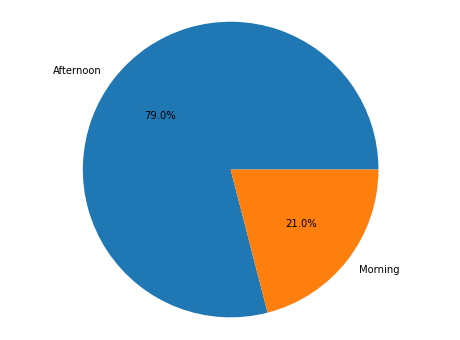

In [67]:
#Analisis de ataques segun la hora del dia
f, ax = plt.subplots(figsize=(8,6))

labels = ['Afternoon', 'Morning']

plt.pie(pm_am, labels=labels,
        autopct='%1.1f%%')
 
axis = plt.axis('equal')

In [68]:
shark_popu_cp = shark_popu.copy()
pivot_count = pd.pivot_table(data = shark_popu_cp,
                             index = ['Activity'],
                             columns=['Area'],
                             values = ['Year'],
                             aggfunc = 'count')
pivot_count

Year                                                         \
Area     Alabama Alaska California Connecticut Delaware Florida Georgia   
Activity                                                                  
Diving       NaN    NaN       45.0         1.0      NaN    57.0     1.0   
Fishing      3.0    NaN       42.0         1.0      4.0    89.0     NaN   
Others       2.0    1.0       34.0         3.0      1.0   133.0     3.0   
Sports       1.0    NaN       31.0         NaN      NaN    51.0     NaN   
Surf         1.0    NaN      106.0         NaN      NaN   404.0     2.0   
Swimming     7.0    NaN       27.0         1.0      2.0   283.0     8.0   

                                   ...                                 \
Area     Hawaii Illinois Kentucky  ... New York North Carolina Oregon   
Activity                           ...                                  
Diving     39.0      NaN      NaN  ...      NaN            8.0    NaN   
Fishing    46.0      NaN      NaN  ...      7.0            7.0    NaN   
Others     31.0      NaN      1.0  ...      5.0           13.0    1.0   
Sports     39.0      NaN      NaN  ...      1.0            3.0    NaN   
Surf       82.0      NaN      NaN  ...      3.0           25.0   28.0   
Swimming   53.0      1.0      NaN  ...     17.0           46.0    NaN   

                                                                              \
Area     Pennsylvania Puerto Rico Rhode Island South Carolina Texas Virginia   
Activity                                                                       
Diving            NaN         1.0          1.0            NaN   1.0      NaN   
Fishing           NaN         2.0          2.0            8.0  14.0      3.0   
Others            1.0         5.0          NaN           44.0  14.0      6.0   
Sports            NaN         NaN          NaN           15.0   3.0      3.0   
Surf              NaN         1.0          NaN           16.0  14.0      2.0   
Swimming          NaN         6.0          4.0           72.0  27.0      5.0   

                     
Area     Washington  
Activity             
Diving          NaN  
Fishing         NaN  
Others          NaN  
Sports          NaN  
Surf            2.0  
Swimming        NaN  

[6 rows x 28 columns]

Text(0.5, 1.0, 'USA ACTIVITY')

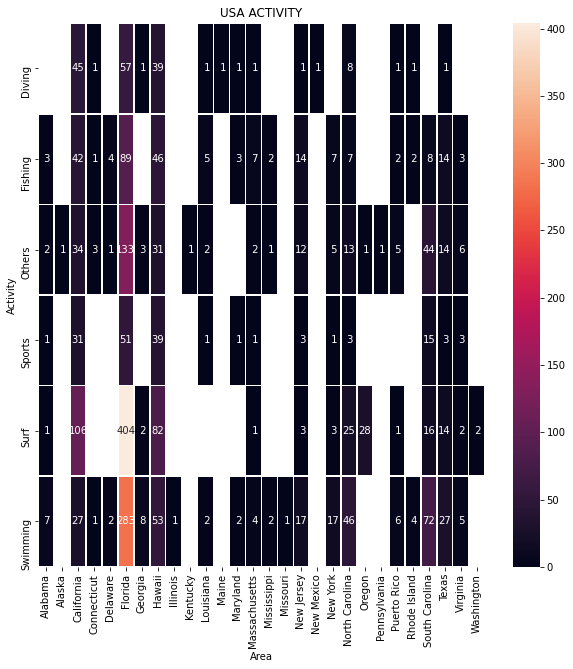

In [69]:
tablfig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(pivot_count['Year'],ax=ax,annot=True,fmt='2.0f',vmin=0,linewidth=.5)
plt.title('USA ACTIVITY')

Text(0, 0.5, 'Month')

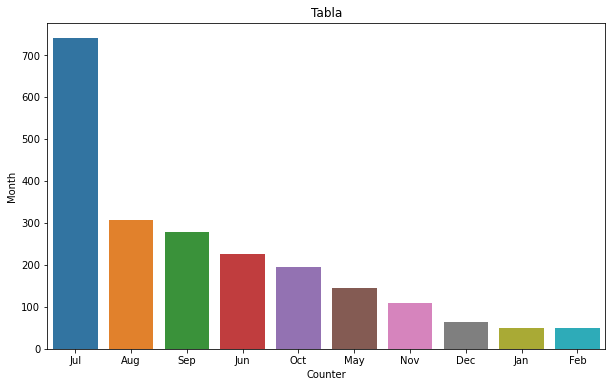

In [70]:
#Numero de ataques por mes
table = shark_popu_cp['Month'].value_counts()
type_index = table.index
type_values = table.values

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x =type_index  , y = type_values , ax =ax ,orient='v')
plt.title('Tabla')
plt.xlabel('Counter')
plt.ylabel('Month')


Text(0, 0.5, 'Area')

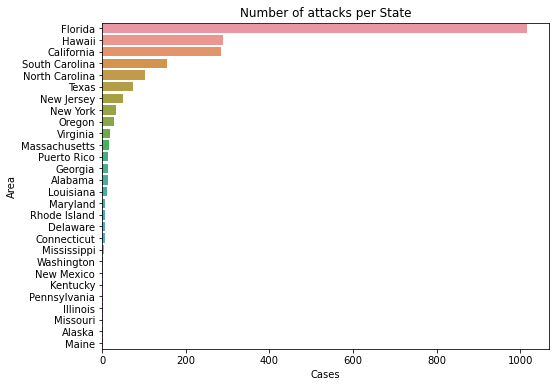

In [71]:
#Numero de ataques por estado
table_count = shark_popu['Area'].value_counts()
type_index = table_count.index
type_values = table_count.values
fig,ax =plt.subplots(figsize=(8,6))
sns.barplot(x = type_values, y = type_index, ax = ax, orient = 'h')
plt.title('Number of attacks per State')
plt.xlabel('Cases')
plt.ylabel('Area')

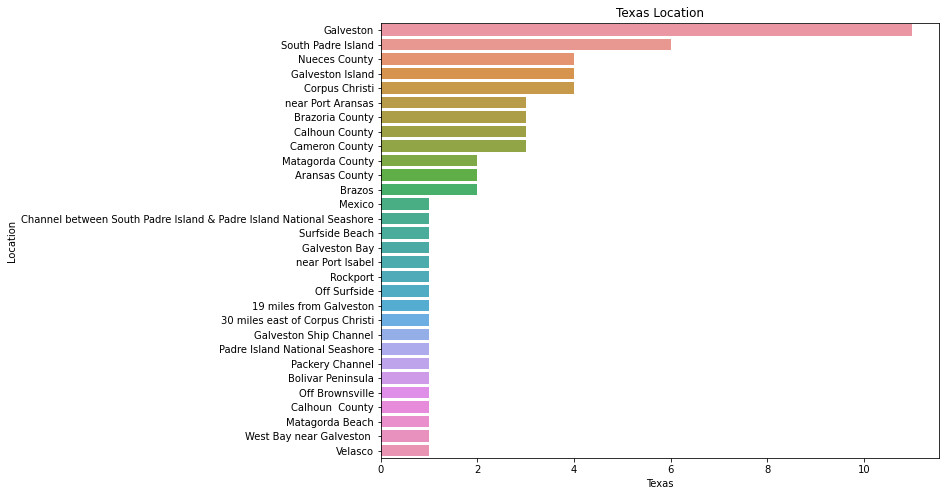

In [72]:
#Funcion para graficar diferentes variables de cada estado, en param uno el estado en param 2 la columna 
def graficas(estado,columna='Activity'):
    df_graf=shark_popu.loc[shark_popu['Area']==estado]
    table_count2 = df_graf[columna].value_counts().head(30)
    type_index2 = table_count2.index
    type_values2 = table_count2.values
    fig,ax =plt.subplots(figsize=(10,8))
    plt.title(f'{estado} {columna}')
    plt.xlabel(f'{estado}')
    plt.ylabel(f'{columna}')
    return sns.barplot(x = type_values2, y = type_index2, ax = ax, orient = 'h')
    

graficas('Texas','Location')

In [73]:
from folium import plugins


shark_map = folium.Map(location=[39.419220, -111.950684], zoom_start=3)

markers = [
    folium.Marker(location=[19.741755, -155.844437], popup='1.Hawaii https://goscubadivemaui.com/?UTM_source=GMB_listing&UTM_medium=organic'),
    folium.Marker(location=[28, -81.5],popup='2.Florida https://www.floridakeysdivecenter.com/'),
    folium.Marker(location=[37.2502200, -119.7512600], popup='3.California https://ecodivecenter.com/'),
    folium.Marker(location=[39.0003900, -75.4999200],popup='4.Delaware https://saltydogdivecenter.com/'),
    folium.Marker(location=[44.0001300, -120.5013900],popup='5.Oregon https://www.centraloregondiving.com/courses'),
    folium.Marker(location=[32.7504100, -86.7502600],popup='6.Alabama https://northalabamadivecenter.com/'),
    folium.Marker(location=[31.2504400, -99.2506100],popup='7.Texas https://www.maximum-scuba.com/'),
    folium.Marker(location=[30.458090, -91.140229],popup='8.Louisiana https://www.harrysdiveshop.com/'),
    folium.Marker(location=[42.407211, -71.382439],popup='9.Massachusetts https://massdiving.com/'),
    folium.Marker(location=[37.926868, -78.024902],popup='10.Virginia https://virginiascuba.com/'),
    folium.Marker(location=[33.000000, -90.000000],popup='11.Mississippi https://deepsouthscuba.net/'),
    folium.Marker(location=[41.599998, -72.699997],popup='12.Connecticut https://ctscuba.org/'),
    folium.Marker(location=[66.160507, -153.369141],popup='13.Alaska http://lastfrontierdiving.com/'),
    folium.Marker(location=[33.247875, -83.441162],popup='14.Georgia https://divegeorgia.com/'),
    folium.Marker(location=[39.299236, -76.609383],popup='15.Maryland https://scubaedu.com/'),
    folium.Marker(location=[46.867702, -69.480286],popup='16.Maine https://www.aquadivingacademy.com/'),
    folium.Marker(location=[47.751076, -120.740135],popup='17.Washington https://www.argonautdiving.com/'),
    folium.Marker(location=[35.782169, -80.793457],popup='18.North Carolina https://www.carolinadivecenter.com/scuba-classes.html'),
    folium.Marker(location=[41.203323, -77.194527],popup='19.Pennsylvania https://www.lvdive.com/'),
                  ]

for marker in markers:
    marker.add_to(shark_map)

shark_map
